In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
os.environ["PROJ_LIB"] = r"C:\Users\maslak\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share"; #fixr
from mpl_toolkits.basemap import Basemap

import mysql.connector
import csv
import plotly.express as px

folder = r'C:\Users\maslak\OneDrive - Amadeus Workplace\L2B\L2B in Python reports'
reseller_folder = r'C:\Users\maslak\OneDrive - Amadeus Workplace\L2B\L2B in Python reports\Reseller_L2B'
provider_folder = r'C:\Users\maslak\OneDrive - Amadeus Workplace\L2B\L2B in Python reports\Provider_L2B'

In [2]:
mydb = mysql.connector.connect(
  host='localhost',
  database='content_inn_prod',
  user='contentinn',
  password='pass'
)
mycursor = mydb.cursor()

In [3]:
headers = ['geo_city_id', 'latitude','longitude']
mycursor.execute("SELECT gc.id, gc.latitude, gc.longitude FROM geo_city gc")
geo_city_data = pd.DataFrame(mycursor.fetchall(),columns = headers)

## Reseller L2B

In [4]:
headers = ['reseller_id','reseller_code', 'geo_city_id', 'city_name','reservation_count',\
            'searches_count','month','source','sequence','period','period_sequence']
mycursor.execute("SELECT * FROM avh_reseller_l2b arl")
reseller_l2b = pd.DataFrame(mycursor.fetchall(),columns = headers)
reseller_l2b

,reseller_id,reseller_code,geo_city_id,city_name,reservation_count,searches_count,month,source,sequence,period,period_sequence
0,69359,HMS,7069891,Madrid-Barajas Airport,0,12,March I half 2018,ws,1,March 2018,1
1,69359,HMS,42168,Sanremo,0,15,March I half 2018,ws,1,March 2018,1
2,69359,HMS,42364,Salerno,0,11,March I half 2018,ws,1,March 2018,1
3,69359,HMS,41483,Varese,0,11,March I half 2018,ws,1,March 2018,1
4,69359,HMS,43962,Genoa,0,10,March I half 2018,ws,1,March 2018,1
5,69359,HMS,42356,Salsomaggiore Terme,0,10,March I half 2018,ws,1,March 2018,1
6,69359,HMS,41905,Siena,0,10,March I half 2018,ws,1,March 2018,1
7,69359,HMS,2664832,Sicily,0,12,March I half 2018,ws,1,March 2018,1
8,69359,HMS,41085,Catania,0,12,March I half 2018,ws,1,March 2018,1
9,69359,HMS,43839,Lido di Jesolo,0,9,March I half 2018,ws,1,March 2018,1


In [5]:
ws = reseller_l2b[reseller_l2b['source'] == 'ws']
b2b = reseller_l2b[reseller_l2b['source'] == 'b2b']

In [6]:
by_cities_ws = ws[['geo_city_id','city_name','reservation_count','searches_count']].groupby(['geo_city_id','city_name']).sum().reset_index()
by_cities_ws['l2b_%'] = round((by_cities_ws['reservation_count']/by_cities_ws['searches_count'])*100,3)
by_cities_ws = by_cities_ws.sort_values('searches_count', ascending=False)
by_cities_ws = pd.merge(by_cities_ws,geo_city_data, how = 'left', on = 'geo_city_id')

top_100_cities_ws = by_cities_ws.head(100)

by_cities_ws

,geo_city_id,city_name,reservation_count,searches_count,l2b_%,latitude,longitude
0,24910,Paris,2710,982430,0.276,48.856667,2.350833
1,7069308,London (UK),1041,734742,0.142,51.507222,-0.1275
2,21135,Barcelona,833,312577,0.266,41.3887868890716,2.15898513793945
3,7069274,New York (NY),256,264381,0.097,40.716667,-74
4,20606,Madrid,895,227874,0.393,40.383333,-3.716667
5,52638,Amsterdam,243,138152,0.176,52.373056,4.892222
6,2021,Brussels,619,130212,0.475,50.8465974826927,4.35277462005615
7,36680,Dublin,317,115090,0.275,53.3330556,-6.2488889
8,12,Dubai,271,107391,0.252,25.25,55.3
9,7069248,BERLIN,389,100419,0.387,52.500556,13.398889


In [7]:
by_periods_ws = ws[['period_sequence','period','reservation_count','searches_count']].groupby(['period_sequence','period']).sum().reset_index()
by_periods_ws['l2b_%'] = round((by_periods_ws['reservation_count']/by_periods_ws['searches_count'])*100,3)

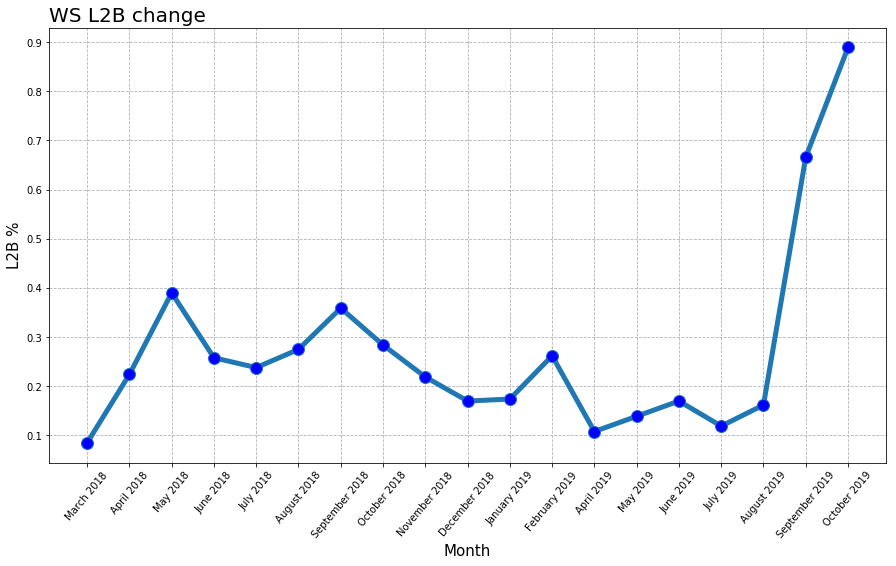

In [8]:
# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)


# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.plot(by_periods_ws['period'], by_periods_ws['l2b_%'],marker='o',\
        markerfacecolor='blue', markersize=12, linewidth=5)
# set plot title
#ax.set(title="L2B change")

plt.grid(linestyle='--')
plt.title("WS L2B change", loc='left', fontsize = 20)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("L2B %", fontsize = 15)

plt.xticks( by_periods_ws['period'], rotation=50)

# add labels to the axes
plt.savefig(reseller_folder+'\\'+'WS_L2B_change.png', bbox_inches='tight')

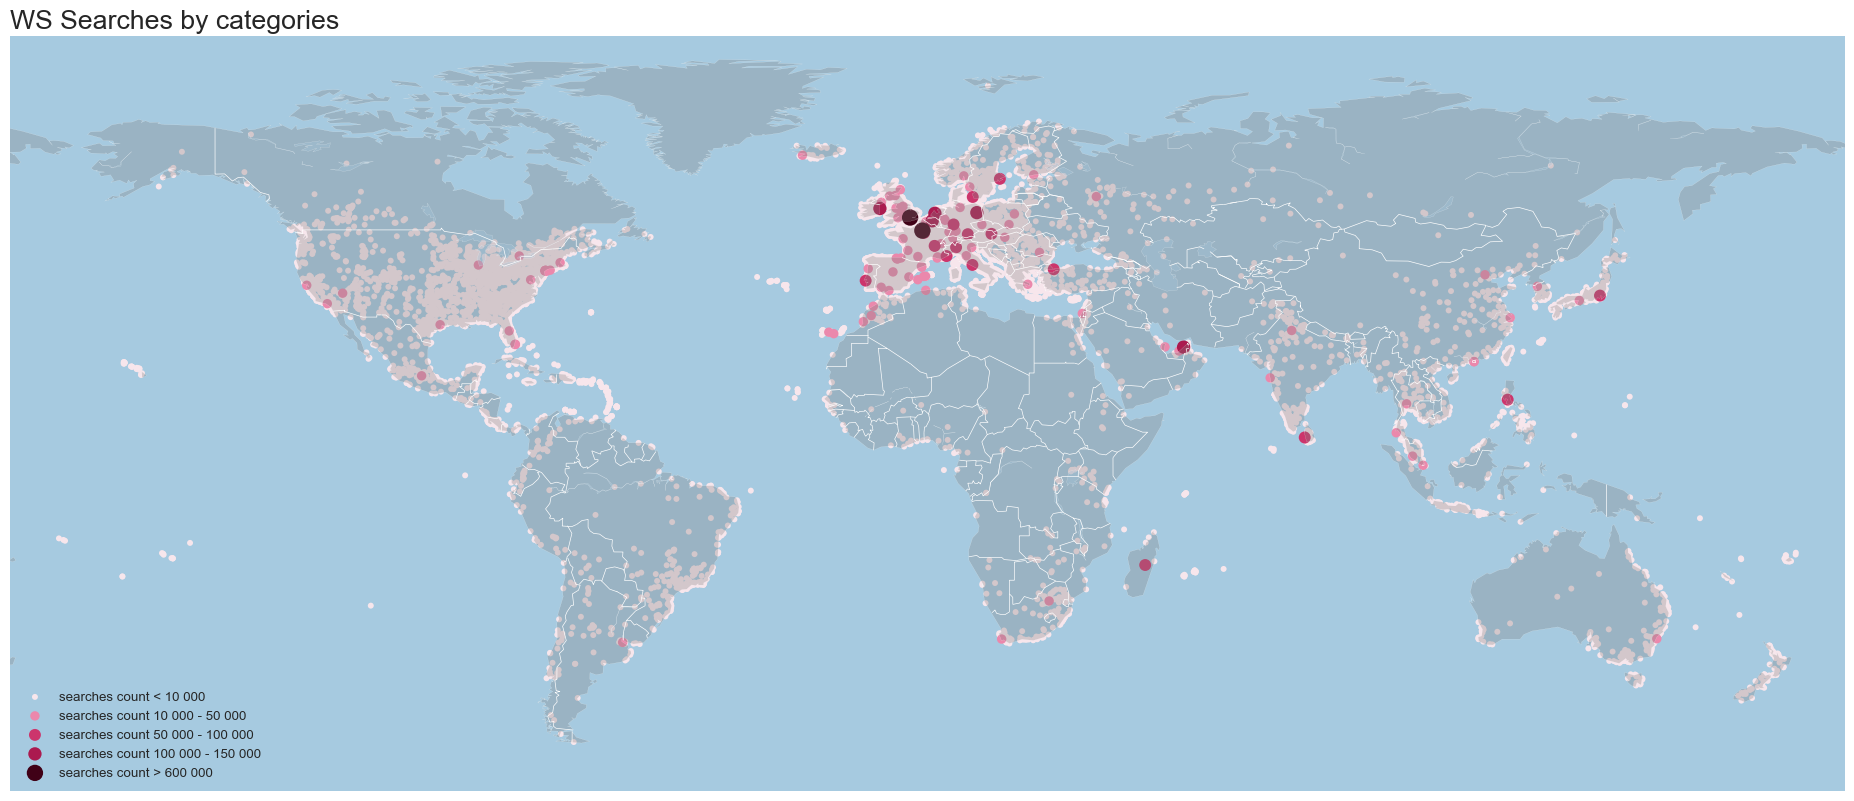

In [120]:
# Searches chart
searches_all = by_cities_ws.copy()

def conditions(searches_all):
    if searches_all['searches_count'] >= 600000:
        return 150
    elif (searches_all['searches_count']<600000)&(searches_all['searches_count']>=150000):
        return 120
    elif (searches_all['searches_count']<150000)&(searches_all['searches_count']>=100000):
        return 100
    elif (searches_all['searches_count']<100000)&(searches_all['searches_count']>=50000):
        return 80
    elif (searches_all['searches_count']<50000)&(searches_all['searches_count']>=10000):
        return 50 
    elif (searches_all['searches_count']<10000)&(searches_all['searches_count']>0):
        return 20  
    else:
        return 0
      
searches_all['size'] = searches_all.apply(conditions, axis=1)
 
searches_all = searches_all.sort_values(by = 'size', ascending=True)
    
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# read the data (on the web)

#data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")

lat = searches_all['latitude'].astype('float64')
lon = searches_all['longitude'].astype('float64')
#l2b = searches_all['l2b_%'].astype('float64')
crowd = searches_all['size'].astype('float64')

# Make the background map
m=Basemap(llcrnrlon=min(lon)-10, llcrnrlat=min(lat)-10,urcrnrlon=max(lon)+10,urcrnrlat=max(lat)+10)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(color="white")



# prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 

for i in [20,50,80,100,150]:
    t = searches_all[searches_all['size'] == i]
    lat1 = t['latitude'].astype('float64')
    lon1 = t['longitude'].astype('float64')
    #l2b = searches_all['l2b_%'].astype('float64')
    crowd1 = t['size'].astype('float64')
    
    
    if i == 20:
        m.scatter(lon1,lat1, s=crowd1,  c='#f7e6ec', edgecolors='none', label = 'searches count < 10 000')
    elif i == 50:
        m.scatter(lon1,lat1, s=crowd1,  c='#eb88ac', edgecolors='none', label = 'searches count 10 000 - 50 000')
    elif i == 80:
        m.scatter(lon1,lat1, s=crowd1,  c='#cc356c', edgecolors='none', label = 'searches count 50 000 - 100 000')
    elif i == 100:
        m.scatter(lon1,lat1, s=crowd1,  c='#ab1a4f', edgecolors='none', label = 'searches count 100 000 - 150 000')
    elif i == 120:
        m.scatter(lon1,lat1, s=crowd1,  c='#870837', edgecolors='none', label = 'searches count 150 000 - 600 000') 
    elif i == 150:
        m.scatter(lon1,lat1, s=crowd1,  c='#400117', edgecolors='none', label='searches count > 600 000')
    else:
        pass

plt.title('WS Searches by categories', loc='left', fontsize=20)
plt.legend()
#plt.show()
plt.savefig(reseller_folder+'\\'+'WS_Searches_by_categories.png', bbox_inches='tight')



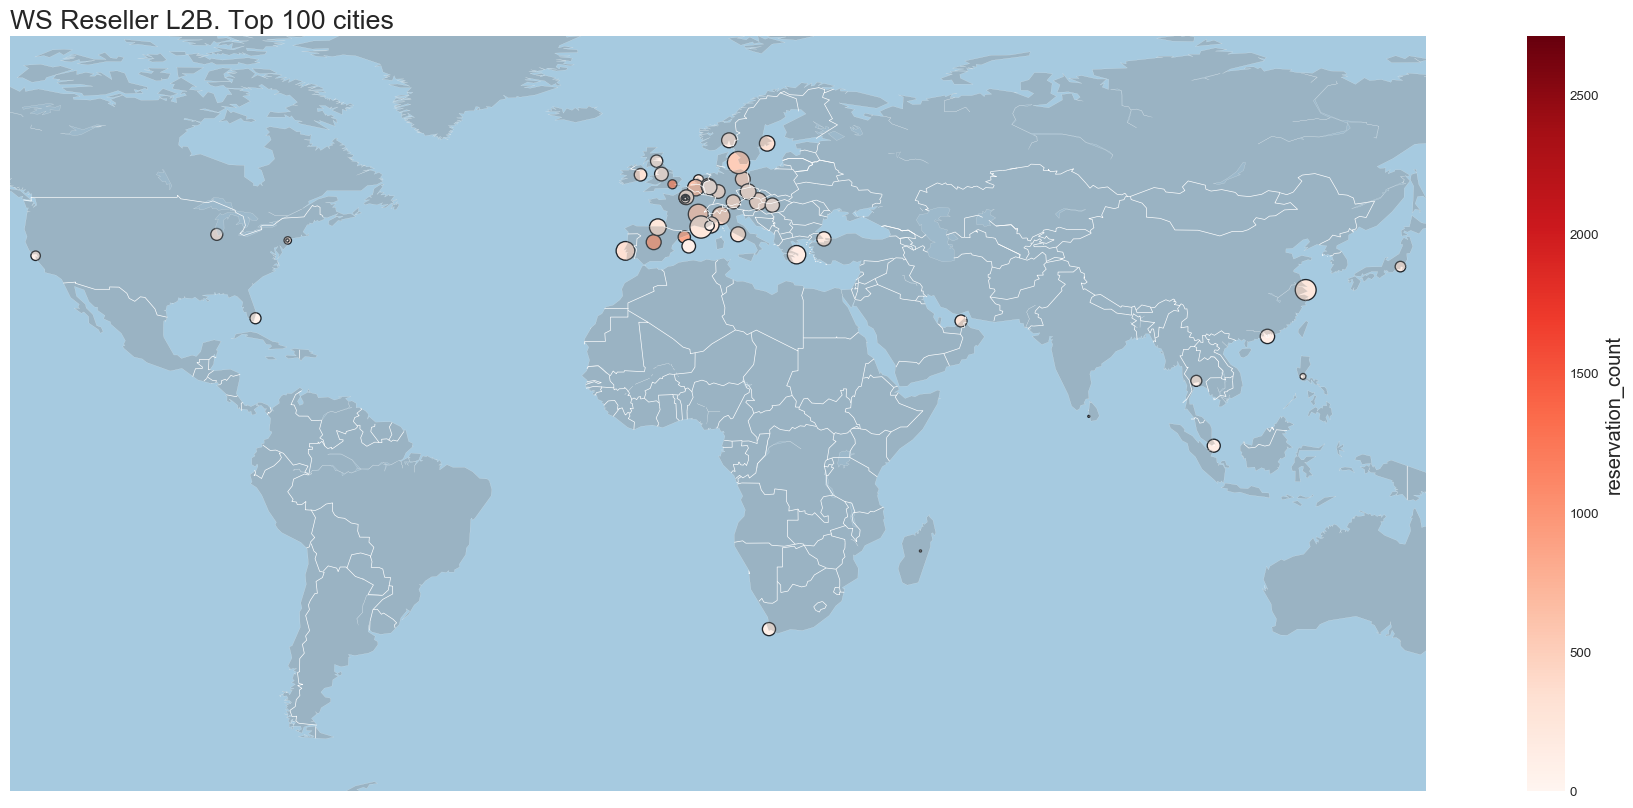

In [121]:
# Reservations chart

# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# read the data (on the web)

#data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
lat = top_100_cities_ws['latitude'].astype('float64')
lon = top_100_cities_ws['longitude'].astype('float64')
l2b = top_100_cities_ws['l2b_%'].astype('float64')
  

# Make the background map
m=Basemap(llcrnrlon=min(lon)-5, llcrnrlat=-65,urcrnrlon=max(lon)+5,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(color="white")


# prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(lon,lat, s=l2b*320,  c=top_100_cities_ws['reservation_count'], cmap='Reds', edgecolors='#1f252b')
 

#plt.colorbar(sctr, ax=ax1, format='$%d')    
    
# copyright and source data info
plt.title('WS Reseller L2B. Top 100 cities', loc='left', fontsize=20)

cbar = plt.colorbar()
cbar.set_label('reservation_count', fontsize=15)

# Creating Table (test)
#import plotly.graph_objects as go

#fig = go.Figure(data=[go.Table(header=dict(values=['City', 'Reservations','L2B%']),
#                 cells=dict(values=[top_100_cities_ws['city_name'],\
#                                    top_100_cities_ws['reservation_count'], top_100_cities_ws['l2b_%']]))
#                     ])
#fig.update_layout(width=500, height=528)
#fig.show()
#fig.savefig(folder+'\\'+'Reseller_l2b_reservations.png', bbox_inches='tight')

# Save as png
plt.savefig(reseller_folder+'\\'+'WS_Reseller_l2b_Top_100.png', bbox_inches='tight')


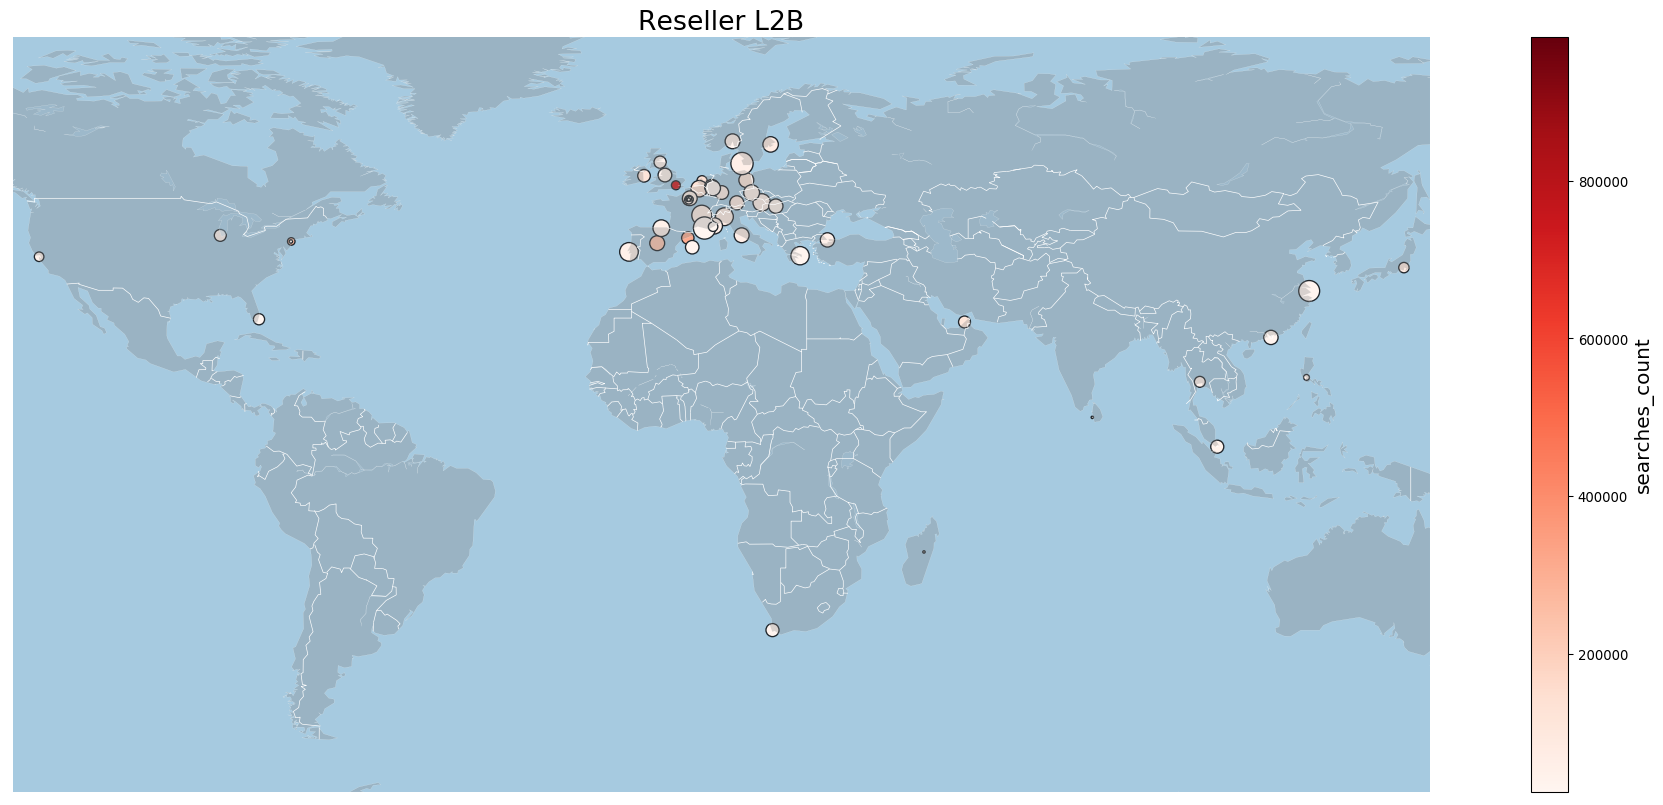

In [11]:
# Searches chart
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# read the data (on the web)

#data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
lat = top_100_cities_ws['latitude'].astype('float64')
lon = top_100_cities_ws['longitude'].astype('float64')
l2b = top_100_cities_ws['l2b_%'].astype('float64')
  

# Make the background map
m=Basemap(llcrnrlon=min(lon)-5, llcrnrlat=-65,urcrnrlon=max(lon)+5,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(color="white")


# prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(lon,lat, s=l2b*320,  c=top_100_cities_ws['searches_count'], cmap='Reds', edgecolors='#1f252b')
 

#plt.colorbar(sctr, ax=ax1, format='$%d')    
    
# copyright and source data info

plt.title('Reseller L2B', loc='left', fontsize=20)

cbar = plt.colorbar()
cbar.set_label('searches_count', fontsize=15)

    

# Save as png
plt.savefig(reseller_folder+'\\'+'Reseller_l2b_searches.png', bbox_inches='tight')


In [12]:
by_cities_ws = by_cities_ws.sort_values('reservation_count', ascending=True)
by_cities_ws = by_cities_ws.drop(by_cities_ws[by_cities_ws.reservation_count==0].index, axis = 0)
#data.drop(data[(data.YearBuilt < 1900) & (data.SalePrice > 300000)], axis=0, inplace=True)
by_cities_ws

,geo_city_id,city_name,reservation_count,searches_count,l2b_%,latitude,longitude
7232,17667,Sonderborg,1,81,1.23,54.9092625383989,9.80736583471298
3729,16415,Celle,1,327,0.31,52.6166667,10.0833333
400,20884,Coslada,1,5746,0.02,40.4333333,-3.5666667
4140,31881,Folkestone,1,270,0.37,51.0833333,1.1833333
4121,44405,Collegno,1,272,0.37,45.077546,7.572419
1186,78479,Waltham (MA),1,1652,0.06,42.3764852,-71.2356113
7703,40478,Trapani,1,68,1.47,38.015843000448,12.510766983032
8525,58386,Bialystok,1,51,1.96,53.1333333,23.15
6414,7081753,Saint-Dizier,1,109,0.92,48.64163,4.956755
5707,7079509,Bad Duerkheim,1,142,0.70,49.459943,8.17261


## Provider L2B

In [122]:
headers = ['searches_key','geo_city_id','city_name','geo_country_id','country_name','reseller_id','reseller_code',\
           'supplier_id','supplier_name','true_supplier','reservation_count','searches_count','source',\
           'month_and_year','sequence','period','period_sequence']
mycursor.execute("SELECT * FROM avh_provider_l2b apl")
provider_l2b = pd.DataFrame(mycursor.fetchall(),columns = headers)
provider_l2b

,searches_key,geo_city_id,city_name,geo_country_id,country_name,reseller_id,reseller_code,supplier_id,supplier_name,true_supplier,reservation_count,searches_count,source,month_and_year,sequence,period,period_sequence
0,7069394@69359@2,7069394,Rio De Janeiro,31,BRAZIL,69359,HMS,2,GoGlobal,GoGlobal,0,175,ws,March I half 2018,1,March 2018,1
1,7069697@69359@2,7069697,Cambridge (MA),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,10,ws,March I half 2018,1,March 2018,1
2,7069673@69359@2,7069673,Honolulu (HI),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,22,ws,March I half 2018,1,March 2018,1
3,7069671@69359@2,7069671,Hawaii (Big Island),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,5,ws,March I half 2018,1,March 2018,1
4,7069647@69359@2,7069647,Denver (CO),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,46,ws,March I half 2018,1,March 2018,1
5,7069643@69359@2,7069643,Miami Beach (FL),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,5,ws,March I half 2018,1,March 2018,1
6,7069550@69359@2,7069550,Fort Lauderdale (FL),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,42,ws,March I half 2018,1,March 2018,1
7,7069546@69359@2,7069546,San Diego (CA),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,31,ws,March I half 2018,1,March 2018,1
8,7069540@69359@2,7069540,Las Vegas (NV),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,141,ws,March I half 2018,1,March 2018,1
9,7069378@69359@2,7069378,Philadelphia (PA),231,United States of America,69359,HMS,2,GoGlobal,GoGlobal,0,7,ws,March I half 2018,1,March 2018,1


In [123]:
provider_ws = provider_l2b[provider_l2b['source'] == 'ws']
provider_b2b = provider_l2b[provider_l2b['source'] == 'b2b']

In [124]:
by_periods_prov = provider_l2b[['period_sequence','source','period','true_supplier','reservation_count','searches_count']].groupby(['period_sequence','source','period','true_supplier']).sum().reset_index()
by_periods_prov['l2b_%'] = round((by_periods_prov['reservation_count']/by_periods_prov['searches_count'])*100,3)
by_periods_prov

,period_sequence,source,period,true_supplier,reservation_count,searches_count,l2b_%
0,1,ws,March 2018,GTA,13,88913,0.015
1,1,ws,March 2018,GoGlobal,97,168222,0.058
2,1,ws,March 2018,HotelBeds,11,119883,0.009
3,1,ws,March 2018,Travco,9,44756,0.020
4,2,ws,April 2018,GTA,71,213318,0.033
5,2,ws,April 2018,GoGlobal,184,392206,0.047
6,2,ws,April 2018,HotelBeds,139,597114,0.023
7,2,ws,April 2018,Travco,47,93880,0.050
8,3,b2b,May 2018,Dotw,0,13,0.000
9,3,b2b,May 2018,GTA,0,8,0.000


In [125]:
by_periods_prov_ws = by_periods_prov[by_periods_prov['source']=='ws']
by_periods_prov_ws = by_periods_prov_ws.sort_values('period_sequence', ascending = True)
by_periods_prov_b2b = by_periods_prov[by_periods_prov['source']=='b2b']

In [126]:
seq = by_periods_prov[['period_sequence','period']].drop_duplicates()
ws_by_provs = by_periods_prov_ws.pivot(index = 'period_sequence', columns = 'true_supplier',values='l2b_%').reset_index()
ws_by_provs = pd.merge(ws_by_provs,seq, how = 'left',on = 'period_sequence' )
ws_by_provs = ws_by_provs.fillna(0)
ws_by_provs

,period_sequence,Acase,Dotw,ElegantTravel,Expedia,GTA,GoGlobal,HotelBeds,IATI,JacTravel,Netmedia,OstrovokLatvia,Paximum,Restel,RoomsXml,TotalStay,Tourico,Travco,period
0,1,0.0,0.000,0.0,0.0,0.015,0.058,0.009,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.020,March 2018
1,2,0.0,0.000,0.0,0.0,0.033,0.047,0.023,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.050,April 2018
2,3,0.0,0.005,0.0,0.0,0.022,0.040,0.015,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.064,May 2018
3,4,0.0,0.017,0.0,0.0,0.051,0.048,0.023,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.102,June 2018
4,5,0.0,0.010,0.0,0.0,0.045,0.067,0.013,0.0,0.028,0.000,0.0,0.000,0.028,0.084,0.000,0.000,0.097,July 2018
5,6,0.0,0.011,0.0,0.0,0.048,0.052,0.016,0.0,0.003,0.000,0.0,0.000,0.029,0.136,0.042,0.029,0.033,August 2018
6,7,0.0,0.007,0.0,0.0,0.052,0.040,0.012,0.0,0.018,0.000,0.0,0.000,0.029,0.290,0.056,0.034,0.122,September 2018
7,8,0.0,0.006,0.0,0.0,0.054,0.045,0.015,0.0,0.016,0.000,0.0,0.018,0.040,0.110,0.037,0.044,0.175,October 2018
8,9,0.0,0.006,0.0,0.0,0.053,0.035,0.013,0.0,0.009,0.000,0.0,0.018,0.022,0.061,0.025,0.032,0.113,November 2018
9,10,0.0,0.004,0.0,0.0,0.061,0.028,0.015,0.0,0.007,0.000,0.0,0.014,0.028,0.044,0.014,0.022,0.100,December 2018


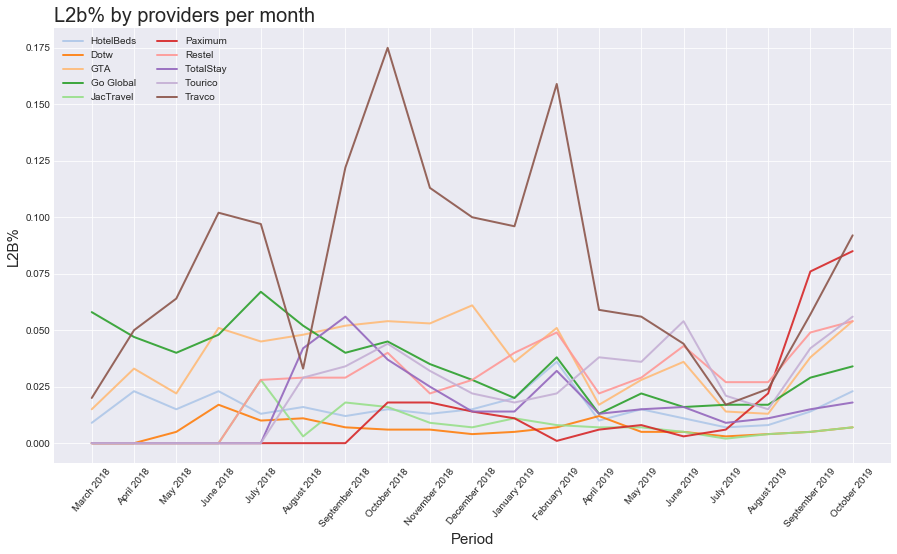

In [127]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
#by_periods_prov_ws = by_periods_prov_ws.sort_values('period_sequence', ascending = True)
    
# Make a data frame
df=pd.DataFrame({'x': list(ws_by_provs['period']), 'HotelBeds': list(ws_by_provs['HotelBeds']), 'Dotw': list(ws_by_provs['Dotw']),\
                 'GTA': list(ws_by_provs['GTA']), 'Go Global': list(ws_by_provs['GoGlobal']),\
                 'JacTravel': list(ws_by_provs['JacTravel']), 'Paximum': list(ws_by_provs['Paximum']),\
                 'Restel': list(ws_by_provs['Restel']),'TotalStay': list(ws_by_provs['TotalStay']),\
                 'Tourico': list(ws_by_provs['Tourico']),'Travco': list(ws_by_provs['Travco'])
                })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab20')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
 
    # Add legend
    plt.legend(loc=2, ncol=2)

plt.xticks( ws_by_provs['period'], rotation=50)
# Add titles
plt.title("L2b% by providers per month", loc='left', fontsize=20, fontweight=0)
plt.xlabel("Period", fontsize=15)
plt.ylabel("L2B%", fontsize=15)

# Save as png
plt.savefig(provider_folder+'\\'+'L2B_by_providers.png', bbox_inches='tight')

In [128]:
provider_b2b


,searches_key,geo_city_id,city_name,geo_country_id,country_name,reseller_id,reseller_code,supplier_id,supplier_name,true_supplier,reservation_count,searches_count,source,month_and_year,sequence,period,period_sequence
22093,7069248@69359@105,7069248,BERLIN,57,GERMANY,69359,HMS,105,GtaDirect,GTA,0,2,b2b,May I half 2018,5,May 2018,3
22165,7069248@69359@2,7069248,BERLIN,57,GERMANY,69359,HMS,2,GoGlobal,GoGlobal,0,1,b2b,May I half 2018,5,May 2018,3
24245,7069248@69359@5,7069248,BERLIN,57,GERMANY,69359,HMS,5,Travco,Travco,0,1,b2b,May I half 2018,5,May 2018,3
28173,7069248@69359@127,7069248,BERLIN,57,GERMANY,69359,HMS,127,HotelbedsLatviaOpaque,HotelBeds,0,2,b2b,May I half 2018,5,May 2018,3
28174,7069248@69359@171,7069248,BERLIN,57,GERMANY,69359,HMS,171,HotelBeds2,HotelBeds,0,3,b2b,May I half 2018,5,May 2018,3
30086,24910@69359@2,24910,Paris,75,FRANCE,69359,HMS,2,GoGlobal,GoGlobal,0,5,b2b,May II half 2018,6,May 2018,3
33621,19360@69359@2,19360,Jaen,68,SPAIN,69359,HMS,2,GoGlobal,GoGlobal,0,2,b2b,May II half 2018,6,May 2018,3
34384,19360@69359@157,19360,Jaen,68,SPAIN,69359,HMS,157,DotwLimited,Dotw,0,2,b2b,May II half 2018,6,May 2018,3
35218,24910@69359@157,24910,Paris,75,FRANCE,69359,HMS,157,DotwLimited,Dotw,0,11,b2b,May II half 2018,6,May 2018,3
39241,24910@69359@127,24910,Paris,75,FRANCE,69359,HMS,127,HotelbedsLatviaOpaque,HotelBeds,0,4,b2b,May II half 2018,6,May 2018,3


In [129]:
prov_by_cities_ws = provider_ws[['geo_city_id','city_name','reservation_count','searches_count']].groupby(['geo_city_id','city_name']).sum().reset_index()
prov_by_cities_ws['l2b_%'] = round((prov_by_cities_ws['reservation_count']/prov_by_cities_ws['searches_count'])*100,3)
prov_by_cities_ws = prov_by_cities_ws.sort_values('searches_count', ascending=False)
prov_by_cities_ws = pd.merge(prov_by_cities_ws,geo_city_data, how = 'left', on = 'geo_city_id')

top_100_cities_ws = prov_by_cities_ws.head(100)
top_100_cities_ws

,geo_city_id,city_name,reservation_count,searches_count,l2b_%,latitude,longitude
0,24910,Paris,2710,23908403,0.011,48.856667,2.350833
1,7069308,London (UK),1041,10276452,0.010,51.507222,-0.1275
2,21135,Barcelona,832,5612174,0.015,41.3887868890716,2.15898513793945
3,7069274,New York (NY),256,4036211,0.006,40.716667,-74
4,20606,Madrid,895,3868315,0.023,40.383333,-3.716667
5,2021,Brussels,619,2256738,0.027,50.8465974826927,4.35277462005615
6,36680,Dublin,317,2033804,0.016,53.3330556,-6.2488889
7,52638,Amsterdam,243,1788595,0.014,52.373056,4.892222
8,26007,Lyon,501,1701787,0.029,45.759723,4.842223
9,12,Dubai,271,1536251,0.018,25.25,55.3


In [130]:
last_period_prov = provider_l2b[provider_l2b['period_sequence'] == provider_l2b['period_sequence'].max()]
last_period_prov_ws = last_period_prov[last_period_prov['source'] == 'ws']
last_period_prov_ws = last_period_prov_ws[['period','true_supplier','reservation_count','searches_count']].groupby(['period','true_supplier']).sum().reset_index()
last_period_prov_ws['l2b_%'] = round((last_period_prov_ws['reservation_count']/last_period_prov_ws['searches_count'])*100,3)
last_period_prov_ws

,period,true_supplier,reservation_count,searches_count,l2b_%
0,October 2019,Dotw,63,917232,0.007
1,October 2019,Expedia,0,102,0.000
2,October 2019,GTA,580,1082053,0.054
3,October 2019,GoGlobal,676,1980476,0.034
4,October 2019,HotelBeds,459,2034485,0.023
5,October 2019,JacTravel,24,365899,0.007
6,October 2019,OstrovokLatvia,0,1032675,0.000
7,October 2019,Paximum,1053,1238192,0.085
8,October 2019,Restel,970,1800185,0.054
9,October 2019,RoomsXml,616,641405,0.096


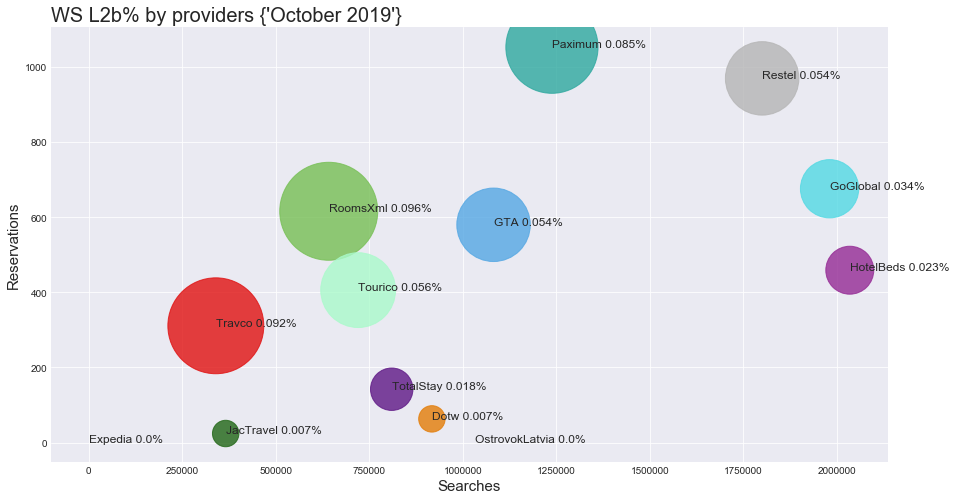

In [131]:
# create data
import seaborn as sns

x = last_period_prov_ws['searches_count']
y = last_period_prov_ws['reservation_count']
z = last_period_prov_ws['l2b_%']
color_dict = ['#e37c07','#fff717','#54a7e3','#52d9e3','#942994',\
              '#206615','#4eab3f','#2da89e','#b5b5b5','#76bf54','#5e1785','#aafacb','#e01010']

provs = last_period_prov_ws['true_supplier']

plt.scatter(x, y,s=z*100000, c=color_dict, alpha=0.8)

for i, txt in enumerate(z):
    plt.annotate((str(provs[i]) + ' ' +str(txt) +'%' ) , (x[i], y[i]), fontsize =12)

plt.title("WS L2b% by providers "+str(set(last_period_prov_ws['period'])) , loc='left', fontsize=20, fontweight=0)
plt.xlabel("Searches", fontsize=15)
plt.ylabel("Reservations", fontsize=15)
    
plt.savefig(provider_folder+'\\'+'WS_L2B_by_providers.png', bbox_inches='tight')